# Classification Model

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
import os

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

### Load The Data
Using our cleaned data

In [3]:
def load_cleaned_data(data_dir):
    all_files = glob(os.path.join(data_dir, "cleaned_boxing_data_*.csv"))
    dataframes = {}
    for file in all_files:
        df = pd.read_csv(file)
        movement_type = file.split("_")[-3]
        df['movement_type'] = movement_type
        file_name = os.path.basename(file)
        dataframes[file_name] = df
    return dataframes

In [4]:
data_dir = '../data/cleaned'
dfs = load_cleaned_data(data_dir)

for file_name, df in dfs.items():
    print(f"File: {file_name}")
    print(df.info())
    print(df.head())
    print(df.describe())

File: cleaned_boxing_data_cross_20241002_190731.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6001 entries, 0 to 6000
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   frame                 6001 non-null   float64
 1   timestamp             6001 non-null   float64
 2   movement_type         6001 non-null   object 
 3   left_shoulder         6001 non-null   object 
 4   right_shoulder        6001 non-null   object 
 5   left_elbow            6001 non-null   object 
 6   right_elbow           6001 non-null   object 
 7   left_wrist            6001 non-null   object 
 8   right_wrist           6001 non-null   object 
 9   left_hip              6001 non-null   object 
 10  right_hip             6001 non-null   object 
 11  left_shoulder_x       6001 non-null   float64
 12  left_shoulder_y       6001 non-null   float64
 13  left_shoulder_z       6001 non-null   float64
 14  right_shoulder_x    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6244 entries, 0 to 6243
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   frame                 6244 non-null   float64
 1   timestamp             6244 non-null   float64
 2   movement_type         6244 non-null   object 
 3   left_shoulder         6244 non-null   object 
 4   right_shoulder        6244 non-null   object 
 5   left_elbow            6244 non-null   object 
 6   right_elbow           6244 non-null   object 
 7   left_wrist            6244 non-null   object 
 8   right_wrist           6244 non-null   object 
 9   left_hip              6244 non-null   object 
 10  right_hip             6244 non-null   object 
 11  left_shoulder_x       6244 non-null   float64
 12  left_shoulder_y       6244 non-null   float64
 13  left_shoulder_z       6244 non-null   float64
 14  right_shoulder_x      6244 non-null   float64
 15  right_shoulder_y     

## Distribution of Movement Types

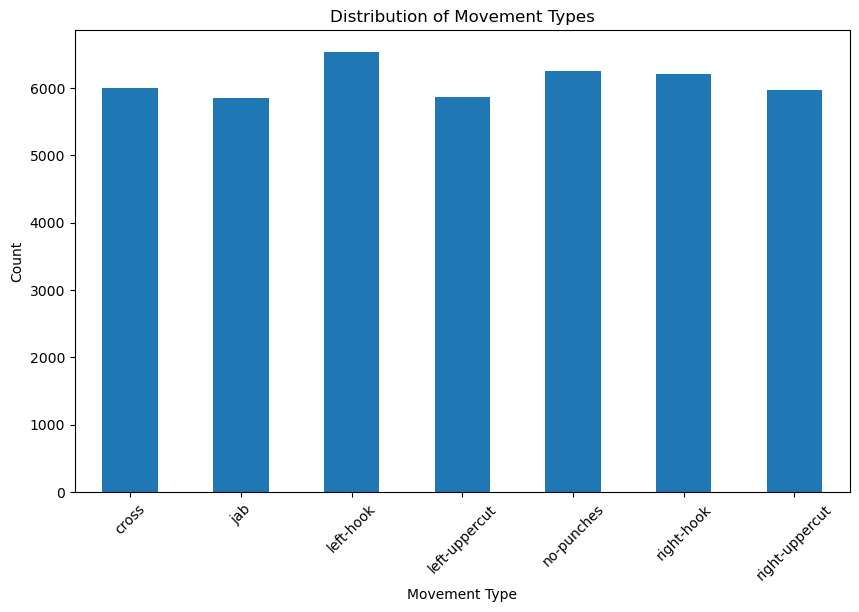

In [5]:
movement_counts = pd.Series(dtype=int)

for file_name, df in dfs.items():
    file_movement_counts = df['movement_type'].value_counts()
    movement_counts = movement_counts.add(file_movement_counts, fill_value=0)
    
plt.figure(figsize=(10, 6))
movement_counts.plot(kind='bar')
plt.title('Distribution of Movement Types')
plt.xlabel('Movement Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Prepare Features and Target

In [13]:
for file_name, df in dfs.items():
    print(f"Processing file: {file_name}")
    
    feature_columns = [col for col in df.columns if col.endswith(('_x', '_y', '_z', '_angle'))]
    X = df[feature_columns]
    y = df['movement_type']
    
    # Split the Data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Split the Data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Train a Random Forest Classifier
    rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_classifier.fit(X_train_scaled, y_train)
    
    # make predictions
    y_pred = rf_classifier.predict(X_test_scaled)
    
    #Evaluate the Model
    print(f"Classification Report for {file_name}:")
    print(classification_report(y_test, y_pred))

Processing file: cleaned_boxing_data_cross_20241002_190731.csv
Classification Report for cleaned_boxing_data_cross_20241002_190731.csv:
              precision    recall  f1-score   support

       cross       1.00      1.00      1.00      1201

    accuracy                           1.00      1201
   macro avg       1.00      1.00      1.00      1201
weighted avg       1.00      1.00      1.00      1201

Processing file: cleaned_boxing_data_jab_20241002_190259.csv
Classification Report for cleaned_boxing_data_jab_20241002_190259.csv:
              precision    recall  f1-score   support

         jab       1.00      1.00      1.00      1171

    accuracy                           1.00      1171
   macro avg       1.00      1.00      1.00      1171
weighted avg       1.00      1.00      1.00      1171

Processing file: cleaned_boxing_data_left-hook_20241002_191201.csv
Classification Report for cleaned_boxing_data_left-hook_20241002_191201.csv:
              precision    recall  f1-scor

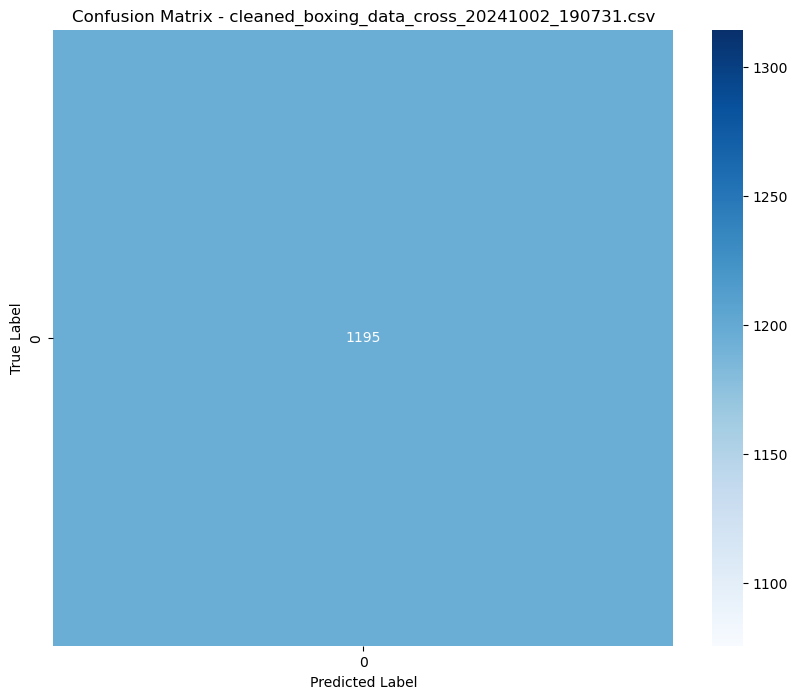

Cross Validation scores for cleaned_boxing_data_cross_20241002_190731.csv: [1. 1. 1. 1. 1.]
Mean CV score: 1.000 (+/- 0.000)


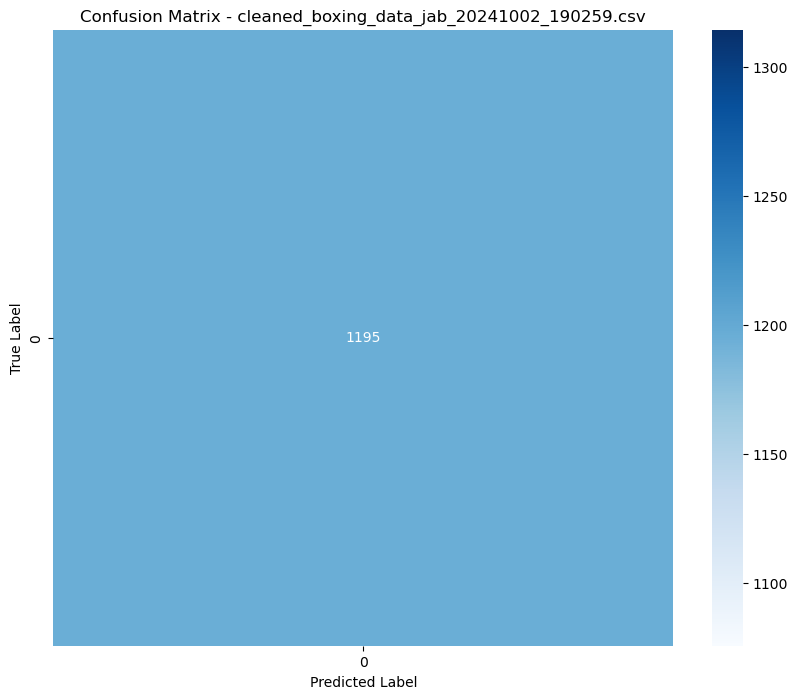

Cross Validation scores for cleaned_boxing_data_jab_20241002_190259.csv: [1. 1. 1. 1. 1.]
Mean CV score: 1.000 (+/- 0.000)


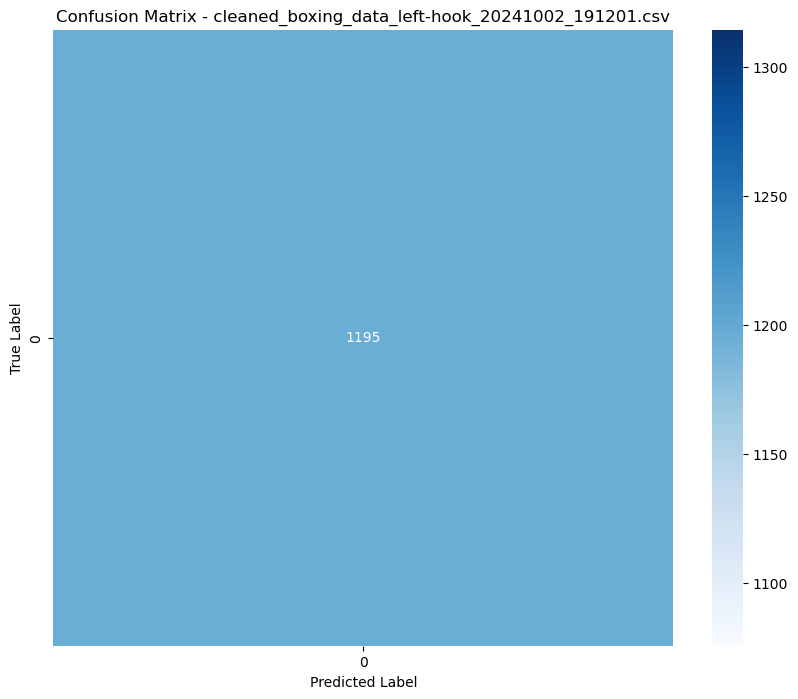

Cross Validation scores for cleaned_boxing_data_left-hook_20241002_191201.csv: [1. 1. 1. 1. 1.]
Mean CV score: 1.000 (+/- 0.000)


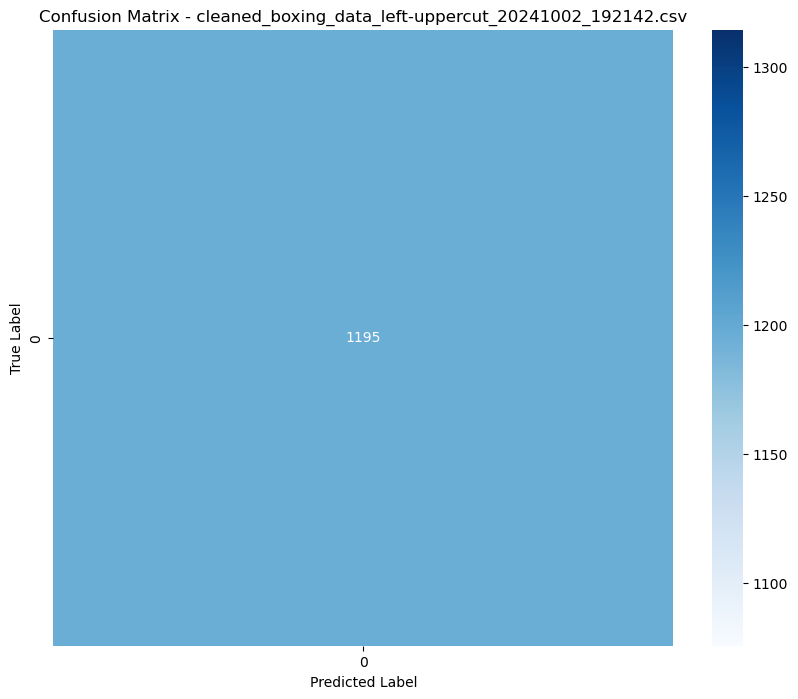

Cross Validation scores for cleaned_boxing_data_left-uppercut_20241002_192142.csv: [1. 1. 1. 1. 1.]
Mean CV score: 1.000 (+/- 0.000)


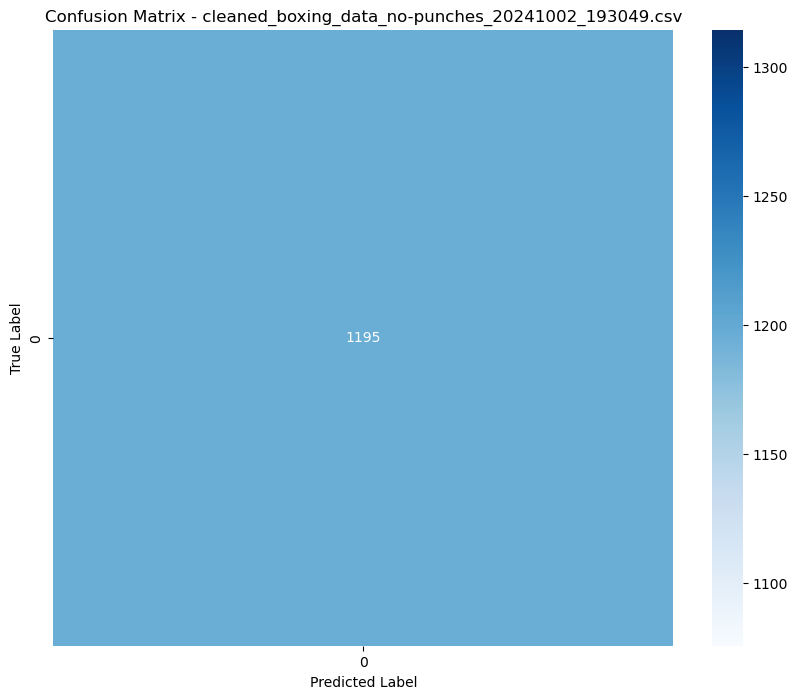

Cross Validation scores for cleaned_boxing_data_no-punches_20241002_193049.csv: [1. 1. 1. 1. 1.]
Mean CV score: 1.000 (+/- 0.000)


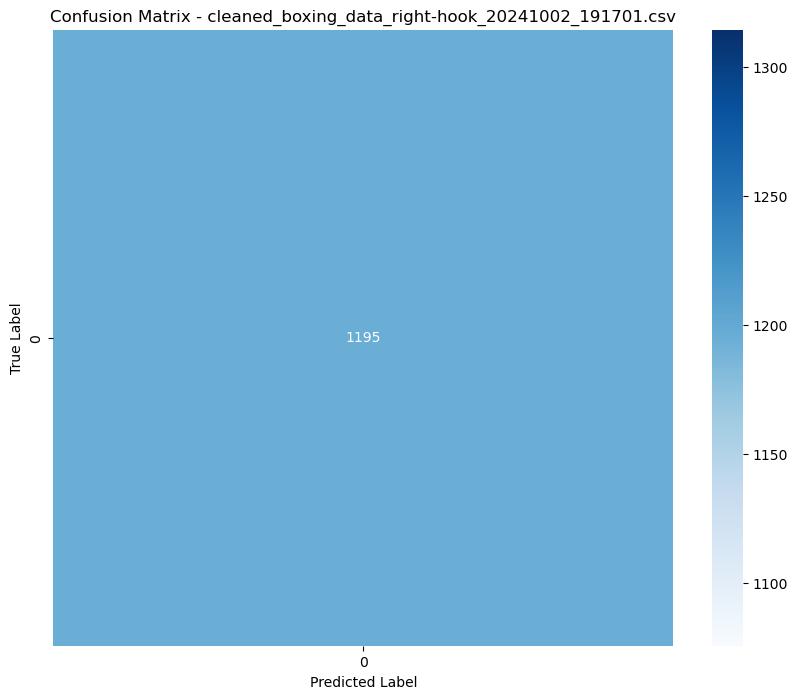

Cross Validation scores for cleaned_boxing_data_right-hook_20241002_191701.csv: [1. 1. 1. 1. 1.]
Mean CV score: 1.000 (+/- 0.000)


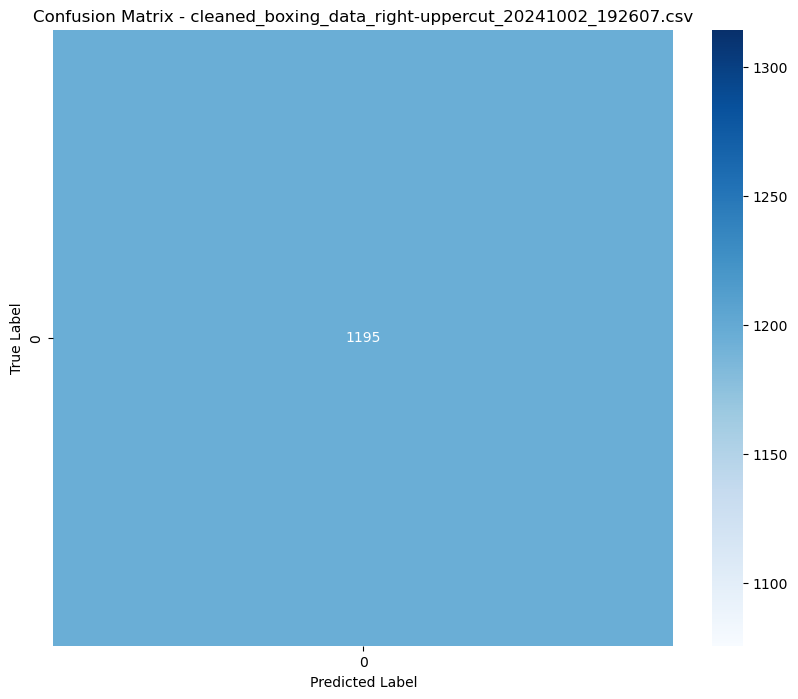

Cross Validation scores for cleaned_boxing_data_right-uppercut_20241002_192607.csv: [1. 1. 1. 1. 1.]
Mean CV score: 1.000 (+/- 0.000)


In [14]:
for file_name, df in dfs.items():
    # Plot a confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {file_name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()
    
    # Perform Cross Validation
    cv_scores = cross_val_score(rf_classifier, X_train_scaled, y_train, cv=5)
    print(f"Cross Validation scores for {file_name}: {cv_scores}")
    print(f"Mean CV score: {cv_scores.mean():.3f} (+/- {cv_scores.std() * 2:.3f})")

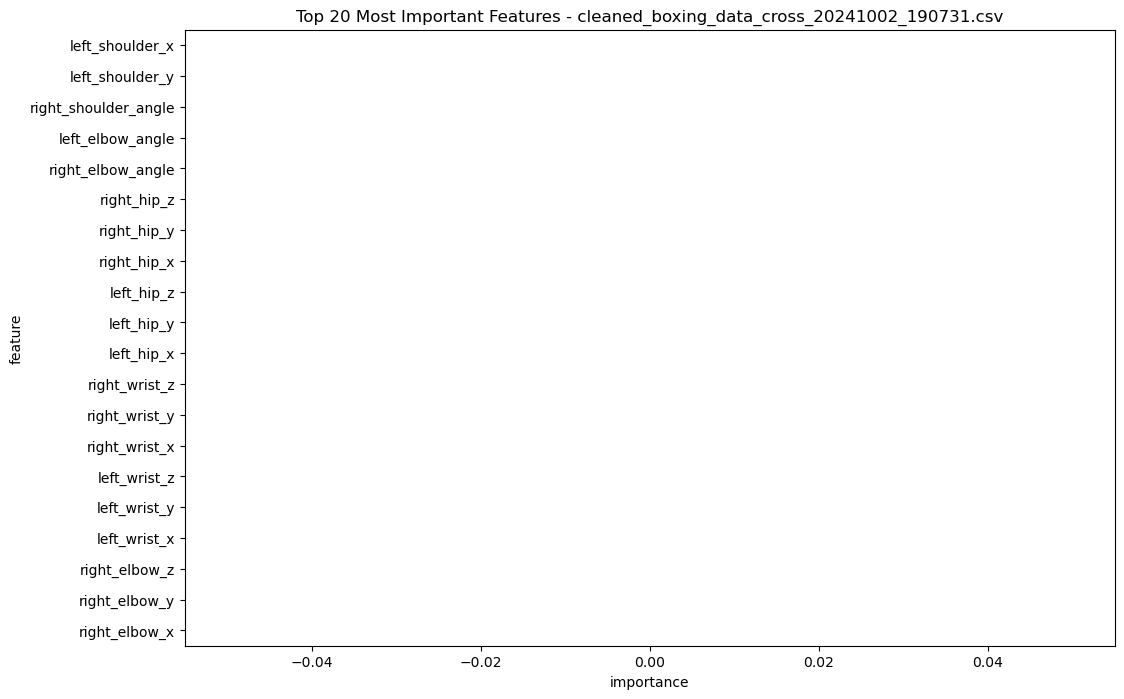

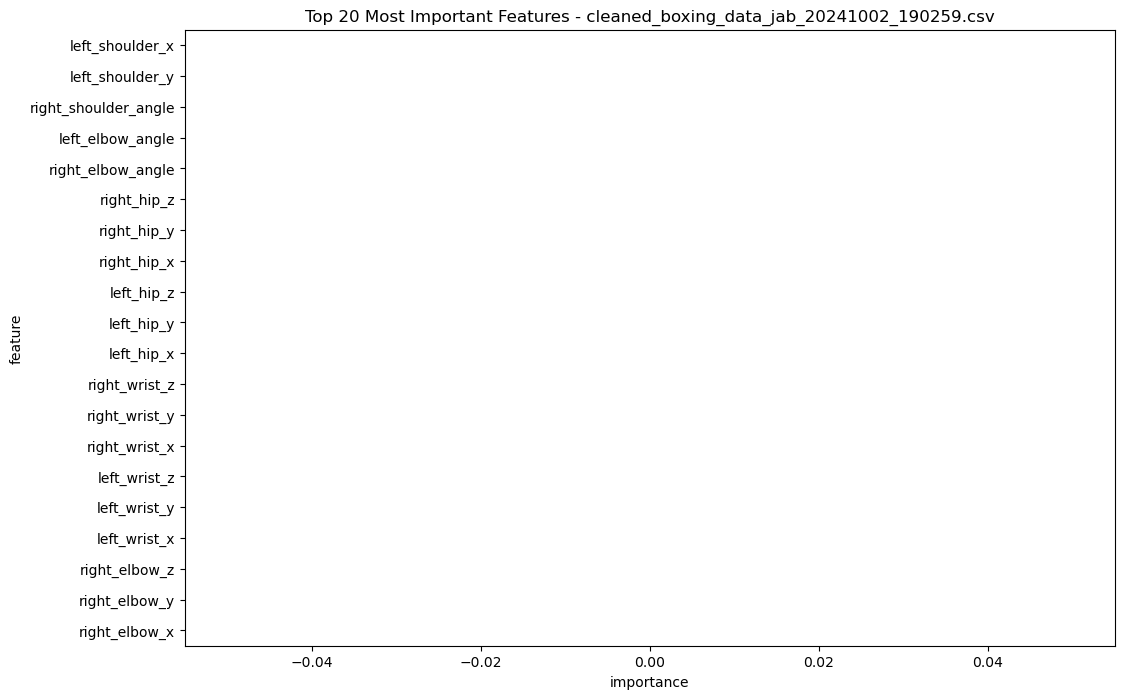

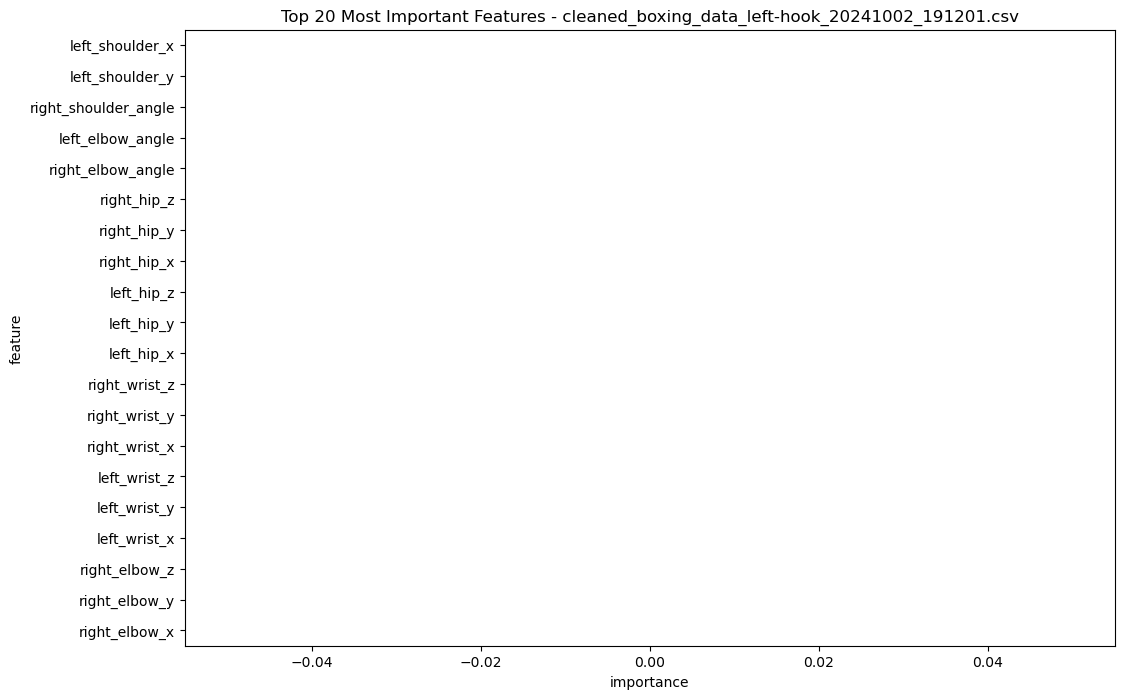

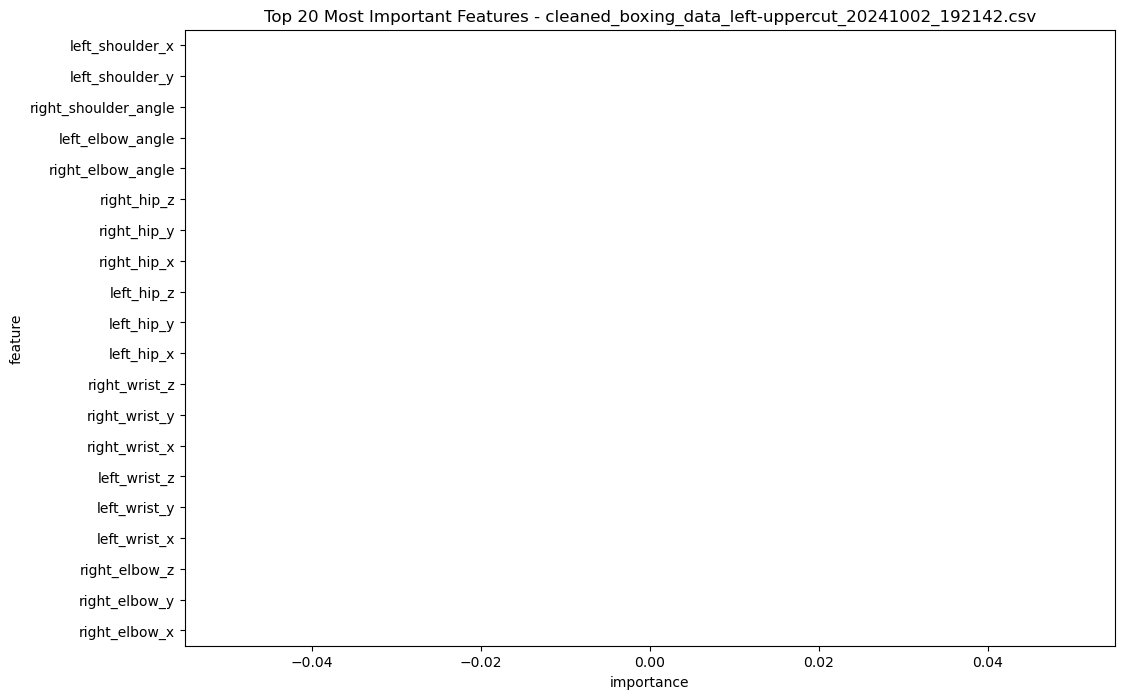

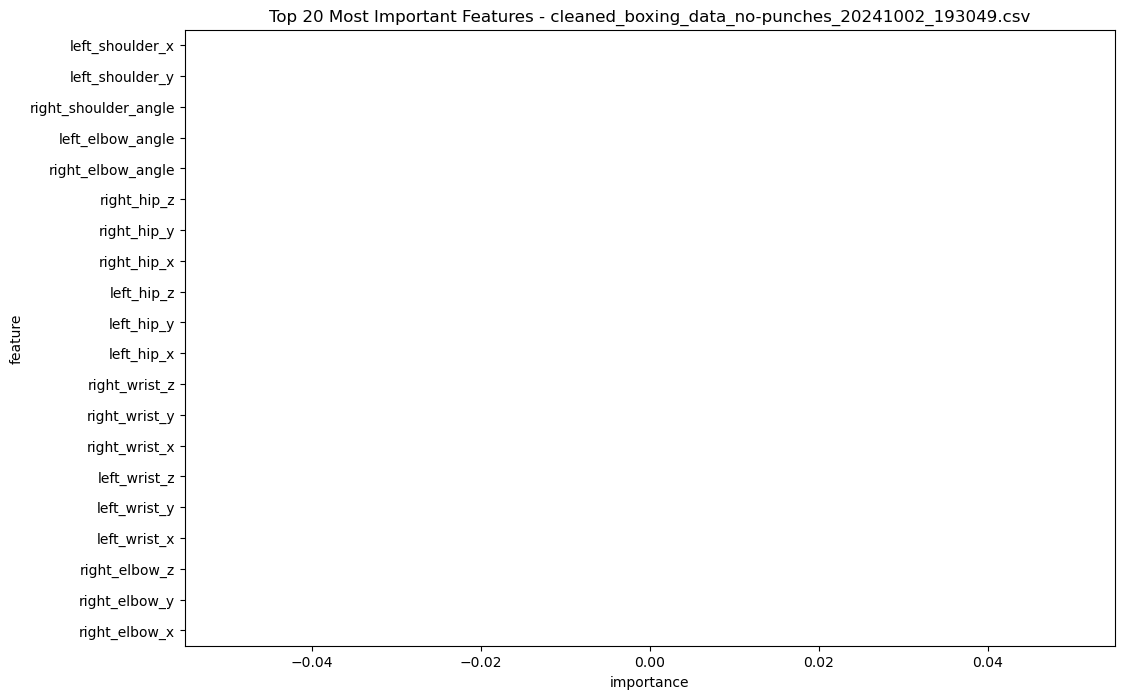

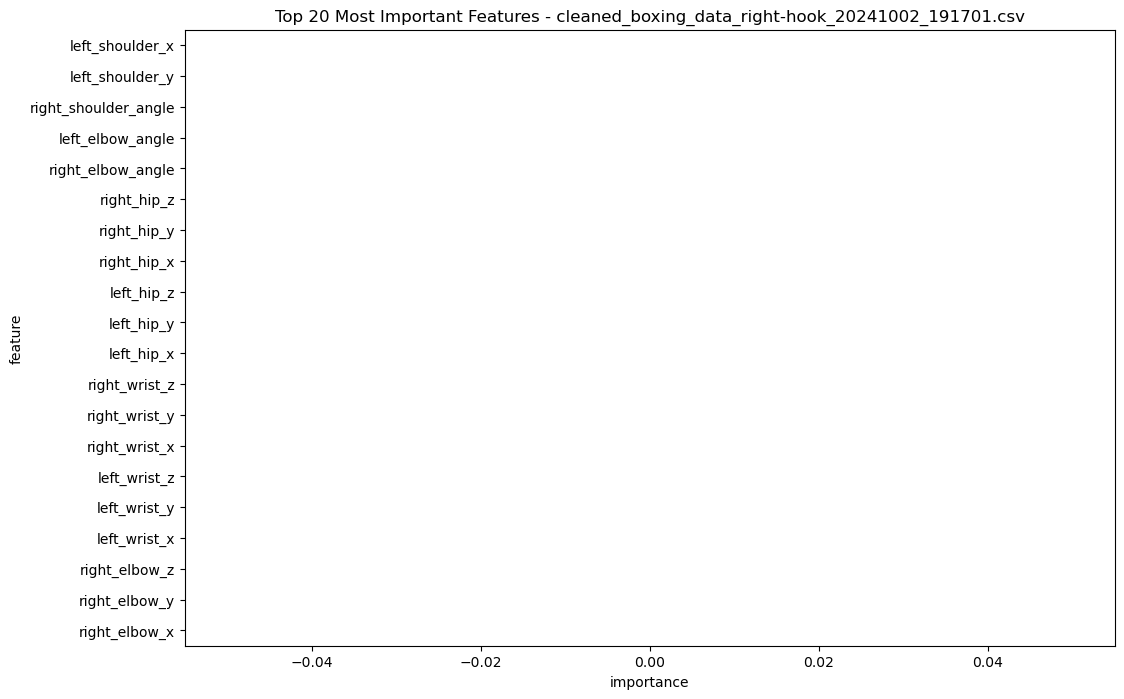

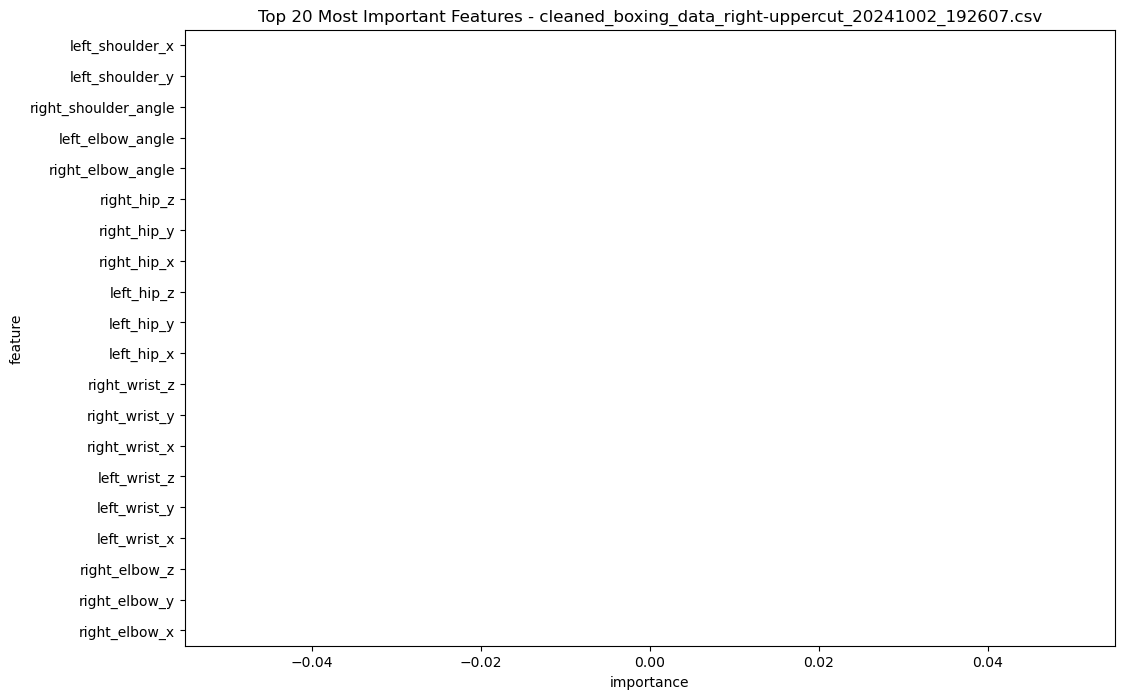

In [18]:
for file_name, df in dfs.items():
    # Feature importance
    feature_importance = pd.DataFrame({
        'feature': feature_columns,
        'importance': rf_classifier.feature_importances_
    }).sort_values('importance', ascending=False)

    plt.figure(figsize=(12, 8))
    sns.barplot(x='importance', y='feature', data=feature_importance.head(20))
    plt.title(f'Top 20 Most Important Features - {file_name}')
    plt.show()

In [20]:
import os
import joblib

# Specify the directory where you want to save the models
save_dir = "../models/"

# Ensure the directory exists, if not, create it
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

for file_name, df in dfs.items():
    # Create the full file path including the directory and file name
    model_filename = os.path.join(save_dir, f'boxing_movement_classifier_{file_name}.joblib')
    
    # Save the model for each file
    joblib.dump(rf_classifier, model_filename)
    print(f"Model for {file_name} saved as '{model_filename}'\n")


Model for cleaned_boxing_data_cross_20241002_190731.csv saved as '../models/boxing_movement_classifier_cleaned_boxing_data_cross_20241002_190731.csv.joblib'

Model for cleaned_boxing_data_jab_20241002_190259.csv saved as '../models/boxing_movement_classifier_cleaned_boxing_data_jab_20241002_190259.csv.joblib'

Model for cleaned_boxing_data_left-hook_20241002_191201.csv saved as '../models/boxing_movement_classifier_cleaned_boxing_data_left-hook_20241002_191201.csv.joblib'

Model for cleaned_boxing_data_left-uppercut_20241002_192142.csv saved as '../models/boxing_movement_classifier_cleaned_boxing_data_left-uppercut_20241002_192142.csv.joblib'

Model for cleaned_boxing_data_no-punches_20241002_193049.csv saved as '../models/boxing_movement_classifier_cleaned_boxing_data_no-punches_20241002_193049.csv.joblib'

Model for cleaned_boxing_data_right-hook_20241002_191701.csv saved as '../models/boxing_movement_classifier_cleaned_boxing_data_right-hook_20241002_191701.csv.joblib'

Model for cl